# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### Import all the Dependencies

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [7]:
IMAGE_SIZE = 256
CHANNELS = 3

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/tomato/tomato/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
   #   save_to_dir='/content/drive/MyDrive/tomato/AugmentedImages'
)

Found 1946 images belonging to 4 classes.


In [9]:
train_generator.class_indices

{'Tomato_Early_blight': 0,
 'Tomato_Late_blight': 1,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 2,
 'Tomato_healthy': 3}

In [10]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_healthy']

In [11]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.6237266  0.63156974 0.6276482 ]
  [0.62764525 0.6354884  0.6315668 ]
  [0.6313726  0.6392157  0.63529414]
  ...
  [0.6156863  0.61960787 0.627451  ]
  [0.6156863  0.61965966 0.6273475 ]
  [0.6156863  0.6198109  0.6270451 ]]

 [[0.6235753  0.63141847 0.6274969 ]
  [0.627494   0.6353371  0.63141555]
  [0.6313726  0.6392157  0.63529414]
  ...
  [0.6156863  0.62342703 0.6198128 ]
  [0.6156863  0.62352943 0.61960787]
  [0.6156863  0.62352943 0.61960787]]

 [[0.62352943 0.6313726  0.627451  ]
  [0.62734276 0.6351859  0.6312643 ]
  [0.6312614  0.63910455 0.635183  ]
  ...
  [0.6156863  0.62352943 0.61960787]
  [0.6156404  0.62348354 0.619562  ]
  [0.6154891  0.62333226 0.6194107 ]]

 ...

 [[0.36033958 0.34857488 0.3211239 ]
  [0.35973457 0.34796986 0.32051888]
  [0.35912958 0.34736484 0.31991386]
  ...
  [0.33210978 0.31250194 0.28897253]
  [0.32035384 0.300746   0.27721658]
  [0.30940193 0.28979406 0.26626465]]

 [[0.3457477  0.33398297 0.306532  ]
  [0.3466552  0.33489048 0.3074395 ]


In [12]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/tomato/tomato/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 277 images belonging to 4 classes.


In [13]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/tomato/tomato/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 560 images belonging to 4 classes.


In [14]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.56113225 0.49054402 0.48270088]
  [0.49757668 0.42698845 0.41914532]
  [0.50677955 0.43619132 0.42834818]
  ...
  [0.7150726  0.6523275  0.6523275 ]
  [0.71556854 0.65282345 0.65282345]
  [0.71606463 0.65331954 0.65331954]]

 [[0.56609255 0.4955043  0.48766115]
  [0.4982381  0.42764986 0.41980672]
  [0.5054568  0.43486857 0.42702544]
  ...
  [0.69878346 0.63603836 0.63603836]
  [0.696634   0.6338889  0.6338889 ]
  [0.69448453 0.63173944 0.63173944]]

 [[0.57105285 0.50046456 0.49262145]
  [0.49889946 0.4283112  0.42046806]
  [0.50413406 0.43354586 0.42570272]
  ...
  [0.6915789  0.62883383 0.62883383]
  [0.69356304 0.63081795 0.63081795]
  [0.69554716 0.63280207 0.63280207]]

 ...

 [[0.6182966  0.55162996 0.5124143 ]
  [0.61730456 0.5506379  0.5114222 ]
  [0.6163125  0.54964584 0.51043016]
  ...
  [0.68068725 0.6218637  0.59441274]
  [0.6877846  0.6289611  0.6015101 ]
  [0.6627338  0.6039102  0.5764592 ]]

 [[0.6383049  0.57163817 0.5324225 ]
  [0.64061964 0.573953   0.5347373 ]


## Building the Model

In [15]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=60,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=8,
    verbose=1,
    epochs=20,
)

Epoch 1/20
60/60 [==============================] - 555s 9s/step - loss: 1.1262 - accuracy: 0.4963 - val_loss: 0.8545 - val_accuracy: 0.6680
Epoch 2/20
60/60 [==============================] - 246s 4s/step - loss: 0.7276 - accuracy: 0.7116 - val_loss: 0.8311 - val_accuracy: 0.6914
Epoch 3/20
60/60 [==============================] - 245s 4s/step - loss: 0.5435 - accuracy: 0.7936 - val_loss: 0.6755 - val_accuracy: 0.7305
Epoch 4/20
60/60 [==============================] - 244s 4s/step - loss: 0.4213 - accuracy: 0.8339 - val_loss: 0.4379 - val_accuracy: 0.8281
Epoch 5/20
60/60 [==============================] - 243s 4s/step - loss: 0.3838 - accuracy: 0.8532 - val_loss: 0.4352 - val_accuracy: 0.8281
Epoch 6/20
60/60 [==============================] - 244s 4s/step - loss: 0.3219 - accuracy: 0.8777 - val_loss: 0.3489 - val_accuracy: 0.8594
Epoch 7/20
60/60 [==============================] - 244s 4s/step - loss: 0.3446 - accuracy: 0.8683 - val_loss: 0.3670 - val_accuracy: 0.8438
Epoch 8/20
60

In [19]:
scores = model.evaluate(test_generator)

18/18 [==============================] - 176s 10s/step - loss: 0.2479 - accuracy: 0.9143


In [20]:
scores

[0.24786189198493958, 0.9142857193946838]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [21]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [22]:
history.params

{'epochs': 20, 'steps': 60, 'verbose': 1}

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [24]:
type(history.history['loss'])

list

In [25]:
len(history.history['loss'])

20

In [26]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.1261531114578247,
 0.7276203632354736,
 0.543501079082489,
 0.42134252190589905,
 0.3837626278400421]

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:
val_acc

[0.66796875,
 0.69140625,
 0.73046875,
 0.828125,
 0.828125,
 0.859375,
 0.84375,
 0.890625,
 0.88671875,
 0.89453125,
 0.83984375,
 0.84765625,
 0.8203125,
 0.9140625,
 0.87109375,
 0.890625,
 0.85546875,
 0.8984375,
 0.890625,
 0.91796875]

In [29]:
acc

[0.4963427484035492,
 0.7115987539291382,
 0.7936258912086487,
 0.8338558077812195,
 0.8531870245933533,
 0.8777429461479187,
 0.8683385848999023,
 0.8981191515922546,
 0.9111807942390442,
 0.8996865153312683,
 0.9200627207756042,
 0.9106582999229431,
 0.9273772239685059,
 0.9226750135421753,
 0.9237199425697327,
 0.9367815852165222,
 0.9289446473121643,
 0.9352142214775085,
 0.9503657221794128,
 0.9137930870056152]

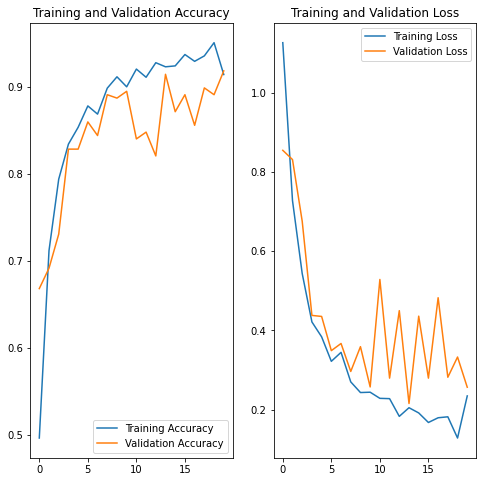

In [30]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato_Late_blight
predicted label: Tomato_Late_blight


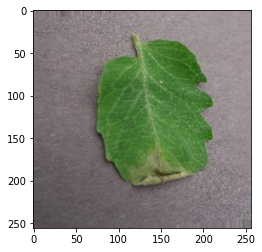

In [36]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

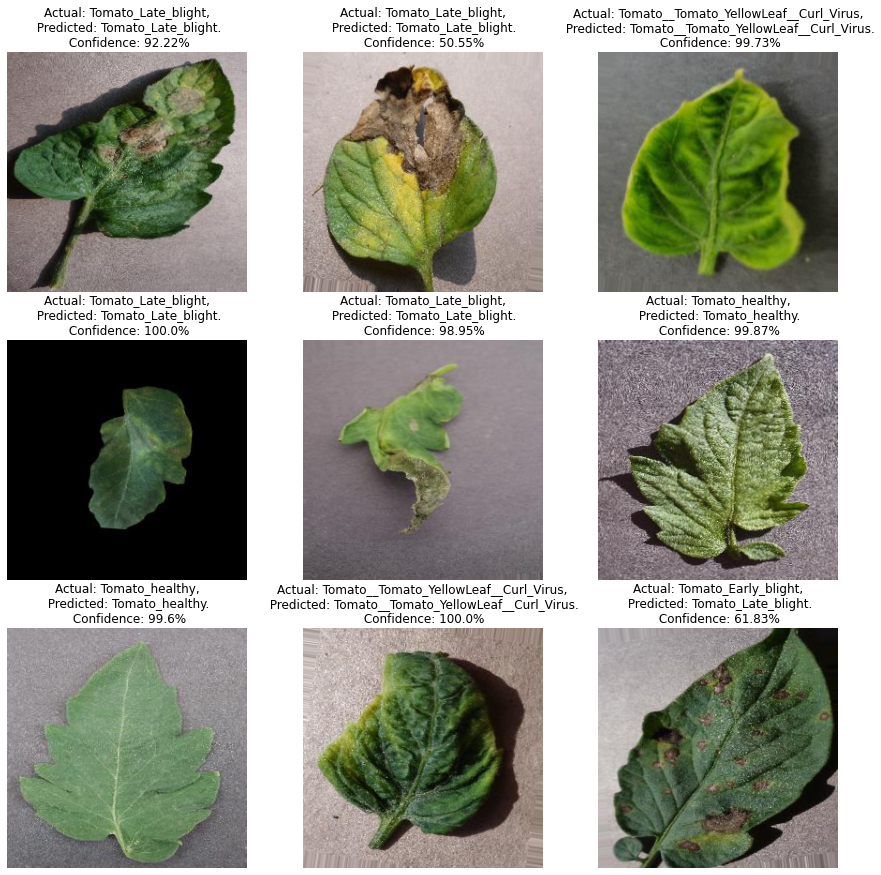

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [37]:
model.save("/content/drive/MyDrive/tomato/tomato/models/tomatoes.h5")